___

# Decision Trees and Random Forests

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
# the age in months
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## Data Analysis

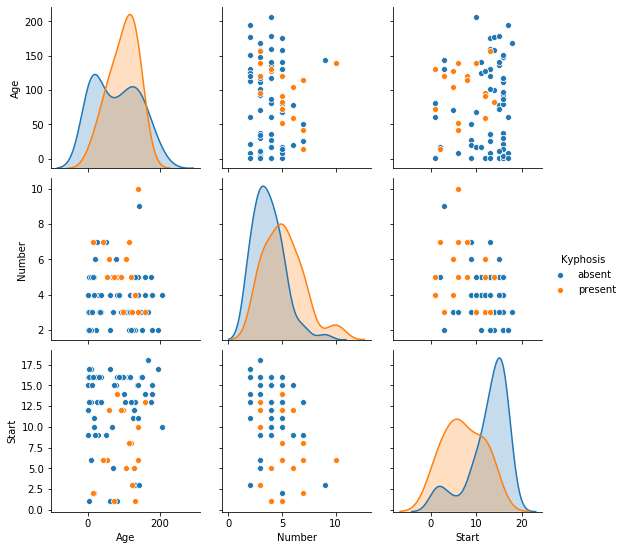

In [5]:
sns.pairplot(df, hue='Kyphosis')

## Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
fit = dtree.fit(X_train, y_train)

## Prediction and Evaluation 

In [12]:
predictions = dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.90      0.86      0.88        21
     present       0.40      0.50      0.44         4

    accuracy                           0.80        25
   macro avg       0.65      0.68      0.66        25
weighted avg       0.82      0.80      0.81        25



In [15]:
print(confusion_matrix(y_test, predictions))

[[18  3]
 [ 2  2]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees.

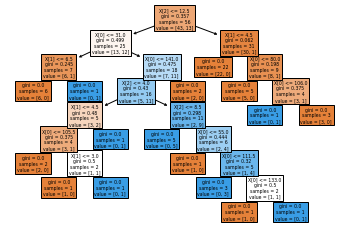

In [16]:
from sklearn import tree
tree.plot_tree(dtree, filled=True);

## Random Forests

Now let's compare the decision tree model to a random forest.

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
rfc_pred = rfc.predict(X_test)

In [19]:
print(confusion_matrix(y_test, rfc_pred))

[[20  1]
 [ 3  1]]


In [20]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.87      0.95      0.91        21
     present       0.50      0.25      0.33         4

    accuracy                           0.84        25
   macro avg       0.68      0.60      0.62        25
weighted avg       0.81      0.84      0.82        25



## Other example using IRIS dataset

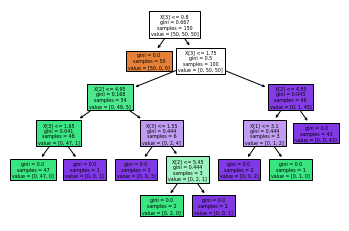

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_tree = DecisionTreeClassifier(random_state=0)
iris_tree.fit(iris.data, iris.target)
tree.plot_tree(iris_tree, filled=True);